# BB84

We are going to use Qiskit to simulate the BB84 protocol

We will use the circuit from our previous notebook to generate random bits

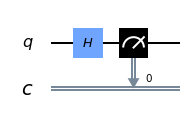

In [2]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

circ_random = QuantumCircuit(1,1) # We need qubit and one classical bit

circ_random.h(0) #We apply the H gate

circ_random.measure(range(1),range(1)) # Measure

circ_random.draw(output='mpl')

In [3]:
n = 100 # Number of bits that we are going to use

# Alice generates n random bits (some of these bits will form the key)

backend = Aer.get_backend('qasm_simulator')
job = execute(circ_random, backend, shots=n, memory = True) # We set the 'memory' parameter to true to be able to access the string of results
bits_alice = [int(q) for q in job.result().get_memory()] 
print(bits_alice)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1]


In [4]:
# Alice randomly chooses the bases in which she is going to measure

job = execute(circ_random, backend, shots=n, memory = True)
basis_alice = [int(q) for q in job.result().get_memory()] 
print(basis_alice)

[1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0]


In [5]:
# Bob also chooses at random the bases in which he will measure

job = execute(circ_random, backend, shots=n, memory = True)
basis_bob = [int(q) for q in job.result().get_memory()] 
print(basis_bob)

[1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1]


In [6]:
# Now, Alice codes each bit of her initial string as a qubit and sends it to Bob, who measures in his basis

bits_bob = []

for i in range(n):
    circ_send = QuantumCircuit(1,1)
    if bits_alice[i]:  # Alice has to send '1'
        circ_send.x(0)
    if basis_alice[i]: # Alice codes in basis |+>, |->
        circ_send.h(0)
        
    # Alice sends the qubit to Bob and he measures
    
    if basis_bob[i]: # Bob has to measure in basis |+>, |->
        circ_send.h(0) 
    
    circ_send.measure(0,0)
    
    job = execute(circ_send, backend, shots = 1, memory = True)
    bits_bob.append(int(job.result().get_memory()[0]))
    
print(bits_bob)
    

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]


In [7]:
# Bob tells Alice the basis he used for his measurements 
# Alice confirms which of the basis are correct

key = []

for i in range(n):
    if basis_alice[i] == basis_bob[i]:
        key.append(bits_bob[i])
        
print("Key length", len(key))
print(key)

Key length 46
[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1]
